<a href="https://colab.research.google.com/github/sarahqasim/Final-Project-DS/blob/main/ds_final_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing libraries

In [ ]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for building neural networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Dropout


# import dataset

In [ ]:
# unzip file uploaded to colab
!unzip sign_mnist_train.csv.zip -d /content/
!unzip sign_mnist_test.csv.zip -d /content/

# using pandas to read files
train_df = pd.read_csv('/content/sign_mnist_train.csv')
test_df = pd.read_csv('/content/sign_mnist_test.csv')



Archive:  sign_mnist_train.csv.zip
  inflating: /content/sign_mnist_train.csv  
Archive:  sign_mnist_test.csv.zip
  inflating: /content/sign_mnist_test.csv  


# analysing dataset

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
train_df.shape

(27455, 785)

In [ ]:
test_df.shape

(7172, 785)

Each training and test case represents a label (0-25) for each alphabet.

columns are label for each label
pixel 1 to pixel 784 for each pixel in each image
as each image is a 28x28 pixel image with grayscale values between 0-255

(28x28 = 784)

train = 27455 images

test = 7172 images

# creating X_train, y_train, X_test, y_test

removing the 'label' column from the input(X_train and X_test values)

and adding to the output or prediction label (y_train and y_test) for our neural network

In [ ]:

# training data
X_train=train_df.drop(['label'],axis=1)
y_train=train_df['label']

# test data
X_test=test_df.drop(['label'],axis=1)
y_test=test_df['label']

print(X_train.shape)
print(X_test.shape)

(27455, 784)
(7172, 784)


# reshaping input data (X_train and X_test)

we see that the training data (pixels) is 2D and our CNN needs an input image of 3D

as the images are grayscale and the image size is 28x28 , we expect input shape to be:



*   number of images (using -1 which automatically counts  
    number of images)
*   width of image
*   height of image
*   grayscale value = 1, rgb = 3

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
print(X_train.shape)

X_test = X_test.values.reshape(-1,28,28,1)
print(X_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


# converting y_train and y_test to binary values

we have labels from 1-24, we need to convert them to a suitable binary form for multi-class classification at the last stage of our neural network

we use LabelBinarizer from scikit learn to one-hot encode this

In [ ]:
# import
from sklearn.preprocessing import LabelBinarizer

# instantiate model
lb = LabelBinarizer()

# fit and tranform on y_train and y_test
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)


# Preprocessing of images

the imagedatagenerator is used for data normalization of the input image pixels for the training data from 0-255 to 0-1

the image is also augemented with techniques like rotation, zooming or flipping to make the input more general and prevent overfitting

the test data is only normalized, augmenting it would introduce biasness

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

# we normalize X_test seperately
X_test=X_test/255

# CNN model

several layers were tried and 3 convolutional layers gave the most accurate results

# Padding

is added to the pooling layer to keep size of input image after so many filters being applied and makes sure edges are involved in more computation

# neuron size
decreasing from 128 to 64 to 32 in each layer

# kernel size
also decreases as layers increase

In [ ]:
# initiate model
model = Sequential()

# add first convolution layer
model.add(Conv2D(128, (5,5), activation = 'relu', input_shape = (28,28,1),padding='same'))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))


# add second convolution layer
model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))

# add third convolution layer
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))

# converting to 1D array to be used as input to dense layers
model.add(Flatten())

# we want to check final 1D array size so we can use same number of neurons in the dense layer
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 32)            │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,384 (173.38 KB)

 Trainable params: 44,384 (173.38 KB)

 Non-trainable params: 0 (0.00 B)

# Dense layers

In [ ]:
# the output of the flatten layer is 512 so we use same number of neurons here
model.add(Dense(units=512,activation='relu'))

# Dropout layer is used to regulate learning and prevent overfitting.
# It randomly sets a fraction of the input units to 0 during training so the network relies on different neurons
model.add(Dropout(rate=0.25))

# output layer uses softmax for multi class classification
model.add(Dense(units=24,activation='softmax'))

# compile

In [ ]:
# compile with adam optimizer and accuracy as metric
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# fitting model on data  

In [ ]:
# adding our augemented version of the training data
# using valdiation data to assess how well model generalizes on unseen data

model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 117s 826ms/step - accuracy: 0.0670 - loss: 3.1195 - val_accuracy: 0.3314 - val_loss: 2.2102
Epoch 2/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 111s 803ms/step - accuracy: 0.2775 - loss: 2.3443 - val_accuracy: 0.4180 - val_loss: 1.6237
Epoch 3/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 110s 798ms/step - accuracy: 0.4527 - loss: 1.6717 - val_accuracy: 0.6976 - val_loss: 0.9134
Epoch 4/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 110s 798ms/step - accuracy: 0.5634 - loss: 1.3119 - val_accuracy: 0.7223 - val_loss: 0.8254
Epoch 5/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 112s 811ms/step - accuracy: 0.6333 - loss: 1.0874 - val_accuracy: 0.7324 - val_loss: 0.6817
Epoch 6/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 111s 804ms/step - accuracy: 0.6870 - loss: 0.9209 - val_accuracy: 0.8086 - val_loss: 0.5267
Epoch 7/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 111s 806ms/step - accuracy: 0.7286 - loss: 0.7861 - val_accuracy: 0.8394 - val_loss: 0.4523
Epoch 8/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 112s 813ms/step - accuracy: 0.7683 -

# evaluate accuracy

In [ ]:
print(model.evaluate(X_test,y_test)[1])

225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9934 - loss: 0.0201
0.9945622086524963


# Accuracy : 99.46%

# checking performance by comparing training and validation accuracy

Both training and validation accuracy increase together and both training and validation loss will decrease together indicating that the model is a good fit


# checking prediction on a random image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


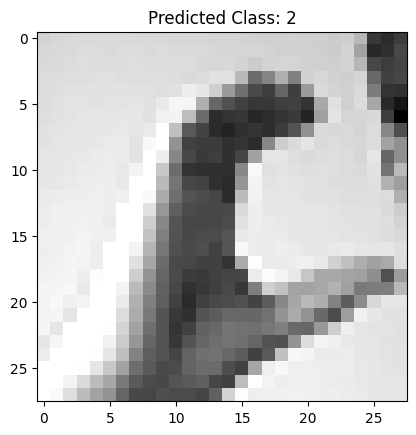

In [ ]:

# randomly select an image from the test data
random_index = np.random.randint
 (0, X_test.shape[0])
random_image = X_test[random_index]

# expand to fit 4D input dimension for CNN
random_image = np.expand_dims(random_image, axis=0)

# get the model's prediction i.e the predicted class
prediction = model.predict(random_image)
predicted_class = np.argmax(prediction, axis=1)

# print the image and predicted class
plt.imshow(X_test[random_index], cmap='gray')
plt.title(f"Predicted Class: {predicted_class[0]}")
plt.show()

